Вся теоретическая информация и задания взяты с сайта
https://judge.mipt.ru/mipt_cs_on_python3/labs/lab18.html


### List
|Операция|Пример |	Трудоемкость |	Замечания |
|--------|-------|--------------|-------------|
|Взятие индекса |	l[i] |	O(1) |	 |
|Сохранение элемента|	l[i] = 0 |	O(1)| |	 
|Длина|	len(l) |	O(1) |	 |
|Добавление в конец |	l.append(5)|	O(1) |	 
|Извлечение с конца	| l.pop()	|O(1) |	 
|Очистка списка	l.clear() |	O(1) |	Аналогично l = [] |
|Срез(Slice) |	l[a:b] |	O(b-a) |	 |
|Расширение |	l.extend(A) |	O(len(A))|	Зависит только от длины A|
|Создание |	list(A)|	O(len(A))	| Зависит от длины A (итерируемый объект)|
|Проверка ==, !=|	l1 == l2|	O(N)|	 |
|Присваивание в срез|	[a:b] = ...|	O(N)| |	 
|Удаление элемента |	del l[i]|	O(N)	| |
|Поиск элемента	| x (not) in l |	O(N) |	Поиск работает за O(N) |
|Копирование списка |	l.copy() |	O(N) |	То же самое что l[:], который O(N) |
|Удаление из списка |	l.remove(..) |	O(N) | |	 
|Извлечение элемента |	l.pop(i) |	O(N) |	O(N-i): l.pop(0):O(N) (см. выше) |
|Экстремумы	 | min(l)/max(l) |	O(N) |	Поиск работает за O(N) |
|Обращение |	l.reverse() |	O(N)	 
|Итерирование |	for v in l: |	O(N)	 
|Сортировка	| l.sort() |	O(N Log N)	 
|Перемножение |	k\*l |	O(k N) |	5\*l будет за O(N), len(l)\*l будет O(N**2)

#### Индексирование и присваивание
Две частые операции - индексирование и присваивание на позицию индекса. В списках Python значения присваиваются и извлекаются из определенных известных мест памяти. Независимо от того, насколько велик список, индексный поиск и присвоение занимают постоянное количество времени и, таким образом их трудоемкость O(1).

#### Pop, Shift, Delete
Извлечение элемента(pop) из списка Python по умолчанию выполняется с конца, но, передавая индекс, вы можете получить элемент из определенной позиции. Когда pop вызывается с конца, операция имеет сложность O(1) , а вызов pop из любого места - O(n). Откуда такая разница?

Когда элемент берется из середины списка Python, все остальные элементы в списке сдвигаются на одну позицию ближе к началу. Это суровая плата за возможность брать индекс за O(1), что является более частой операцией.

По тем же причинам вставка в индекс - O(N); каждый последующий элемент должен быть сдвинут на одну позицию ближе к концу, чтобы разместить новый элемент. Неудивительно, что удаление ведет себя таким же образом.

#### Итерирование
Итерирование выполняется за O(N), потому что для итерации по N элементам требуется N шагов. Это также объясняет, почему оператор in, max, min в Python является O(N): чтобы определить, находится ли элемент в списке, мы должны перебирать каждый элемент.

#### Срезы
Чтобы получить доступ к фрагменту [a: b] списка, мы должны перебрать каждый элемент между индексами a и b. Таким образом, доступ к срезу - O(k), где k - размер среза. Удаление среза O(N) по той же причине, что удаление одного элемента - O(N): N последующих элементов должны быть смещены в сторону начала списка.

#### Умножение на int
Чтобы понять умножение списка на целое k, вспомним, что конкатенация выполняется за O(M), где M - длина добавленного списка. Из этого следует, что умножение списка равно O(N k), так как умножение k-размера списка N раз потребует времени k (N-1).

#### Разворот списка
Разворот списка - это O(N), так как мы должны переместить каждый элемент.

**Замечание**
Если list.append(x) то в какой-то момент может возникнуть аллокация новой памяти
придется перезжать и все перезаписывать)

#### Упражнение №1
Допишите в следующем коде учаток функции, где repeat_count раз повторяется взятие операции pop по индексу pop_position. Сделается чтобы если pop_position == None то брался pop() без указания индекса. Допишите код получения массивов values1, values2, values3. Покажите преподавателю получившиеся графики.

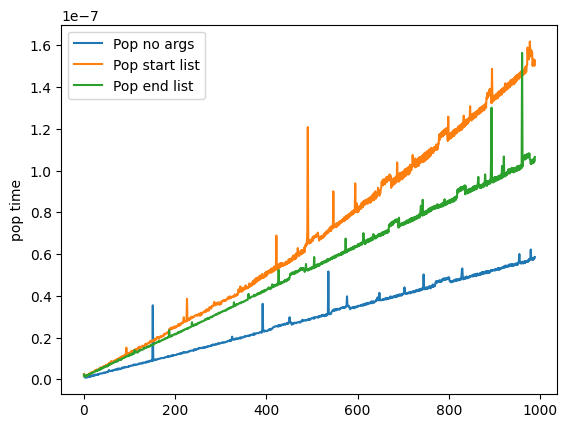

In [1]:
import matplotlib.pyplot as plt
import time

def get_pop_time(size, repeat_count, pop_position=None):
    '''
    size - размер списка из нулей на котором будем тестировать скорость операции pop
    repeat_count - количество повторений для усреднения
    pop_position - позиция с которой делаем pop
    '''
    l = [0] * size
    start_time = time.time()
    #
    # code here
    i=0
    while i < size and i<repeat_count:
        if pop_position == None:
            l.pop()
        elif -size <= pop_position < size:
            l.pop(pop_position)
        i+=1
    #
    end_time = time.time()
    return (end_time - start_time) / repeat_count

repeat_count = 1000
# code here
values1 = [get_pop_time(size, repeat_count) for size in range(10, 1000)]
values2 = [get_pop_time(size, repeat_count,pop_position=0) for size in range(10, 1000)]
values3 = [get_pop_time(size, repeat_count,pop_position=-1) for size in range(10, 1000)]

plt.plot(values1, label='Pop no args')
plt.plot(values2, label='Pop start list')
plt.plot(values3, label='Pop end list')
plt.ylabel('pop time')
ax = plt.subplot(111)
ax.legend()
plt.show()

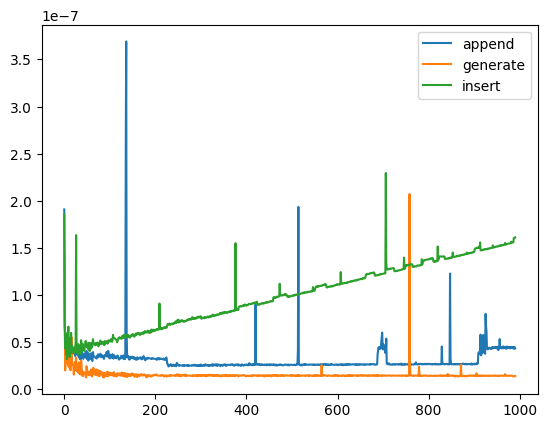

In [19]:
def get_list_operation_time(size,operation:str,index=0):
    """Calcs time of operations creating list:
    append, insert and generator list(operation 'generate')
    index is optional - if operation is insert  inserts to index
    Get list size, operation"""
    if operation=="append":
        start=time.time()
        l=[]
        for i in range (size):
            l.append(i)
        end=time.time()
    elif operation=="generate":
        start=time.time()
        l=[i for i in range (size)]
        end=time.time()
    elif operation=="insert":
        start=time.time()
        l=[i for i in range(index+1)]
        start=time.time()
        for i in range(index+1,size):
            l.insert(index,i)
        end=time.time()
        size-=index+1
    else: return
    return (end-start)/size
operations=("append","generate","insert")
for operation in operations:
    values=[get_list_operation_time(size,operation) for size in range(10,1001)]
    plt.plot(values,label=operation)
plt.legend()
plt.show()
#run a few times

### Множество (set)
Множество в языке Python — это структура данных, эквивалентная множествам в математике. Элементы могут быть различных типов. Порядок элементов не определён.

Действия, которые можно выполнять с множеством:

добавлять и удалять элементы, \
проверять принадлежность элемента множеству, \
перебирать его элементы, \
выполнять операции над множествами (объединение, пересечение, разность). \
Операция “проверить принадлежность элемента” выполняется в множестве намного быстрее, чем в списке.

Элементами множества может быть любой неизменяемый тип данных: числа, строки, кортежи. \

Изменяемые типы данных не могут быть элементами множества, в частности, нельзя сделать элементом множества список (вместо этого используйте неизменяемый кортеж) или другое множество. Требование неизменяемости элементов множества накладывается особенностями представления множества в памяти компьютера.

#### Задание множеств
Множество задается перечислением в фигурных скобках. Например:

A = {1, 2, 3} \
Исключением явлеется пустое множество: \

    A = set()       # A -- множество \
    D = {}          # D -- не пустое множество, а пустой словарь! \
Если функции set передать в качестве параметра список, строку или кортеж, то она вернет множество, составленное из элементов списка, строки, кортежа. Например:

    A = set('qwerty')
    print(A)
{'e', 'q', 'r', 't', 'w', 'y'}.

Каждый элемент может входить в множество только один раз. \

    A = {1, 2, 3}
    B = {3, 2, 3, 1}
    print(A == B) # A и B — равные множества.
True

    set('Hello')
{'H', 'e', 'l', 'o'}

#### Работа с элементами множеств
|Операция|	Значение|	Трудоемкость|
|--------|----------|---------------|
x in A	| принадлежит ли элемент x множеству A (возвращают значение типа bool) |	O(1)
x not in A |	то же, что not x in A |	O(1)
A.add(x) |	добавить элемент x в множество A |	O(1)
A.discard(x)|	удалить элемент x из множества A |	O(1)
A.remove(x)	|удалить элемент x из множества A |	O(1)
A.pop() |	удаляет из множества один случайный элемент и возвращает его |	O(1)

Как мы видим, по времени стандартные оперцаии с одним элементом множества выполняются за O(1).

Поведение discard и remove различается тогда, когда удаляемый элемент отсутствует в множестве: discard не делает ничего, а метод remove генерирует исключение KeyError. Метод pop также генерирует исключение KeyError, если множество пусто.

При помощи цикла for можно перебрать все элементы множества:

    Primes = {2, 3, 5, 7, 11}
    for num im Primes:
        print(num)
        
Из множества можно сделать список при помощи функции list:

    A = {1, 2, 3, 4, 5}
    B = list(A)
[1, 2, 3, 4, 5]


#### Упражнение №2
Вывести на экран все элементы множества A, которых нет в множестве B.


#### Операции с множествами, обычные для математики
Операция |	Значение | Трудоемкость
---------|-----------|------------
A \| B A.union(B) |Возвращает множество, являющееся объединением множеств A и B. | O(len(A)+len(B))
A \| = B A.update(B) |	Записывает в A объединение множеств A и B. |	O(len(A)+len(B))
A & B A.intersection(B) |	Возвращает множество, являющееся пересечением множеств A и B.	 |O(min(len(A), len(B))
A &= B A.intersection_update(B) |	Записывает в A пересечение множеств A и B. | O(min(len(A), len(B))
A - B A.difference(B) |	Возвращает разность множеств A и B (элементы, входящие в A, но не входящие в B). | O(len(A)+len(B))
A -= B A.difference_update(B) | Записывает в A разность множеств A и B. | O(len(A)+len(B))
A ^ B A.symmetric_difference(B) | Возвращает симметрическую разность множеств A и B (элементы, входящие в A или в B, но не в оба из них одновременно). | O(len(A)+len(B))
A ^= B A.symmetric_difference_update(B) | Записывает в A симметрическую разность множеств A и B. | O(len(A)+len(B))
A <= B A.issubset(B) | Возвращает True, если A является подмножеством B. | O(len(A))
A >= B A.issuperset(B) | Возвращает True, если B является подмножеством A. | O(len(B))
A < B | Эквивалентно A <= B and A != B | O(len(A))
A > B |	Эквивалентно A >= B and A != B | O(len(B))

В случае, если нужно провести процедуру, затрагивающую все элементы множества, то его трудоемкость будет O(N).

Упражнение №3
Даны четыре множества:

    A = set('0123456789') 
    B = set('02468')
    C = set('12345')
    D = set('56789')
Найти элементы, принадлежащие множеству E: \
$ E=((A \B) \cap (C\D)) \cup((D\A) \cap(B\C)) $

In [3]:
A = set('0123456789') 
B = set('02468')
C = set('12345')
D = set('56789')
E= ((A-B)&(C-D))|((D-A)&(B-C))
E

{'1', '3'}

### Словарь (ассоциативный массив, dict)
В массиве или в списке индекс - это целое число. Традиционной является следующая ситуация:

    Days = ['Sunday', 'Monday', 'Tuesday', 'Wednessday', 'Thursday', 'Friday', 'Saturday']
    Days[0]
'Sunday' \

    Days[1]
'Monday' \
А как реализовать обратное соответствие? 

    Days['Sunday']
0

    Days['Monday']
1

При помощи списка или массива это сделать невозможно, нужно использовать ассоциативный массив или словарь.

В словаре индекс может быть любого неизменяемого типа! Индексы, как и сами хранимые значения, задаются явно:

    Days = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednessday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
    }
    Days['Sunday']
0

    Days['Monday']
1

    Days['Yesterday']
KeyError: 'Yesterday'

При попытке обратиться к несуществующему элементу ассоциативного массива мы получаем исключение KeyError.

Особенностью ассоциативного массива является его динамичность: в него можно добавлять новые элементы с произвольными ключами и удалять уже существующие элементы.

    Days['Yesterday'] = -1
    print(Days['Yesterday'])
-1

При этом размер используемой памяти пропорционален размеру ассоциативного массива. Доступ к элементам ассоциативного массива выполняется хоть и медленнее, чем к обычным массивам, но в целом довольно быстро.

Значения ключей уникальны, двух одинаковых ключей в словаре быть не может. А вот значения могут быть одинаковыми.

    Days['Tomorrow'] = -1
    Days['Yesterday'] == Days['Tomorrow']
True

Ключом может быть произвольный неизменяемый тип данных: целые и действительные числа, строки, кортежи. Ключом в словаре не может быть множество, но может быть элемент типа frozenset: специальный тип данных, являющийся аналогом типа set, который нельзя изменять после создания. Значением элемента словаря может быть любой тип данных, в том числе и изменяемый.

#### Создание словаря
Пустой словарь можно создать при помощи функции dict() или пустой пары фигурных скобок {} (вот почему фигурные скобки нельзя использовать для создания пустого множества).

Для создания словаря с некоторым набором начальных значений можно использовать следующие конструкции:

    Capitals = {'Russia': 'Moscow', 'Ukraine': 'Kiev', 'USA': 'Washington'}
    Capitals = dict(Russia = 'Moscow', Ukraine = 'Kiev', USA = 'Washington')
    Capitals = dict([("Russia", "Moscow"), ("Ukraine", "Kiev"), ("USA", "Washington")])
    Capitals = dict(zip(["Russia", "Ukraine", "USA"], ["Moscow", "Kiev", "Washington"]))
    
Также можно использовать генерацию словаря через Dict comprehensions:

    Cities = ["Moscow", "Kiev", "Washington"]
    States = ["Russia", "Ukraine", "USA"]
    CapitalsOfState = {state: city for city, state in zip(Cities, States)}
Это особенно полезно, когда нужно "вывернуть" словарь наизнанку:

    StateByCapital = {CapitalsOfState[state]: state for state in CapitalsOfState}


#### Операции с элементами словарей
Операция|	Значение|	Трудоемкость
--------|----------|--------------
value = A[key] |	Получение элемента по ключу. Если элемента с заданным ключом в словаре нет, то возникает исключение KeyError. |	O(1)
value = A.get(key) |	Получение элемента по ключу. Если элемента в словаре нет, то get возвращает None. |	O(1)
value = A.get(key, default_value) |	То же, но вместо None метод get возвращает default_value.|	O(1)
key in A |	Проверить принадлежность ключа словарю. |	O(1)
key not in A |	То же, что not key in A. |	O(1)
A[key] = value|	Добавление нового элемента в словарь.|	O(1)
del A[key] |	Удаление пары ключ-значение с ключом key. Возбуждает исключение KeyError, если такого ключа нет. |	O(1)
   if key in A: del A[key] | Удаление пары ключ-значение с предварительной проверкой наличия ключа. |	O(1)
try:       del A[key]    except KeyError:    pass | Удаление пары ключ-значение с перехватыванием и обработкой исключения. |	O(1)
value = A.pop(key)|	Удаление пары ключ-значение с ключом key и возврат значения удаляемого элемента.Если такого ключа нет, то возбуждается KeyError. |	O(1)
value = A.pop(key, default_value) | То же, но вместо генерации исключения возвращается default_value. |	O(1)
A.pop(key, None) |	Это позволяет проще всего организовать безопасное удаление элемента из словаря. |	O(1)
len(A) |	Возвращает количество пар ключ-значение, хранящихся в словаре. |	O(1)

#### Перебор элементов словаря по ключу
    for key in A:
        print(key, A[key])
#### Представления элементов словаря
Представления во многом похожи на списки, но они остаются связанными со своим исходным словарём и изменяются, если менять значения элементов словаря.

Метод keys возвращает представление ключей всех элементов.
Метод values возвращает представление всех значений.
Метод items возвращает представление всех пар (кортежей) из ключей и значений.

    A = dict(a='a', b='b', c='c')
    k = A.keys()
    v = A.values()
    k, v
 
(dict_keys(['c', 'b', 'a']), dict_values(['c', 'b', 'a']))

    A['d'] = 'a'
    k, v
(dict_keys(['d', 'c', 'b', 'a']), dict_values(['a', 'c', 'b', 'a']))

Учтите что итерироваться по представлениям изменяя словарь нельзя

    for key in A.keys():
        del A[key]

RuntimeError: dictionary changed size during iteration

Можно, если в начале скопировать представление в список

    for key in list(A.keys()):
        del A[key]
    A
{}

#### Пример использования словаря
    # Создадим пустой словать Capitals
    Capitals = dict()

    # Заполним его несколькими значениями
    Capitals['Russia'] = 'Moscow'
    Capitals['Ukraine'] = 'Kiev'
    Capitals['USA'] = 'Washington'
    # Считаем название страны
    print('В какой стране вы живете?')
    country = input()

    # Проверим, есть ли такая страна в словаре Capitals
    if country in Capitals:
        # Если есть - выведем ее столицу
        print('Столица вашей страны', Capitals[country])
    else:
        # Запросим название столицы и добавим его в словарь
        print('Как называется столица вашей страны?')
        city = input()
        Capitals[country] = city
        
#### Трудоемкость стандартных операций
Второй основной тип данных Python - это словарь. Как вы помните, словарь отличается от списка возможностью доступа к элементам по ключу, а не позиции. На данный момент наиболее важной характеристикой является то, что получение и присваивание элемента в словаре являются операциями за O(1).

Мы не будем пытаться пока дать интуитивное объяснение этому, но будьте уверены, что позже мы обсудим реализации словарей. Пока просто помните, что словари были созданы специально для того, чтобы как можно быстрее получить и установить значения по ключу.

Другая важная операция словаря - проверка наличия ключа в словаре. Операция contains также работает за O(1) (в случае со списками это занимало O(N)), потому что проверка для данного ключа подразумевает простое получение элемента по ключу, которое делается за O(1).

#### Когда нужно использовать словари
Словари нужно использовать в следующих случаях: 

* Подсчет числа каких-то объектов. В этом случае нужно завести словарь, в котором ключами являются объекты, а значениями — их количество.
* Хранение каких-либо данных, связанных с объектом. Ключи — объекты, значения — связанные с ними данные. Например, если нужно по названию месяца определить его порядковый номер, то это можно сделать при помощи словаря Num['January'] = 1; Num['February'] = 2; ...
* Установка соответствия между объектами (например, “родитель—потомок”). Ключ — объект, значение — соответствующий ему объект.
* Если нужен обычный массив, но при этом масимальное значение индекса элемента очень велико, но при этом будут использоваться не все возможные индексы (так называемый “разреженный массив”), то можно использовать ассоциативный массив для экономии памяти.

### Практическая работа по использованию словарей
#### Упражнение №4. Подсчет слов
Дан текст на некотором языке. Требуется подсчитать сколько раз каждое слово входит в этот текст и вывести десять самых часто употребяемых слов в этом тексте и количество их употреблений.

В качестве примера возьмите файл с текстом лицензионного соглашения Python /usr/share/licenses/python/LICENSE.

Подсказка №1: Используйте словарь, в котором ключ -- слово, а знчение -- количество таких слов.

Подсказка №2: Точки, запятые, вопросы и восклицательные знаки перед обработкой замените пробелами(используйте punctuation из модуля string).

Подсказка №3: Все слова приводите к нижнему регистру при помощи метода строки lower().

Подсказка №4: По окончании сбора статистики нужно пробежать по всем ключам из словаря и найти ключ с максимальным значением.


In [2]:
import sys  
sys.path.insert(1, '../lib')

In [3]:
import seach_files as sf
from pathlib import Path
import sys
import string
import time
def count_words(stream):
    """Counts words in text
    Gets stream to read
    returns dict word:count word
    some words with part1-part2 counts as 2 words
    float numbers or id's with '.' can't be count correctly"""
    words_count={}
    punctuation=string.punctuation
    #punctuation.remove('-')
    translation_table = str.maketrans(punctuation, ' '*len(punctuation))
    print(punctuation)
    while True:
        s=stream.readline()
        if s=="": break
        s=s.rstrip('\n')
        # s=s.removesuffix('\n') from version 3.9 more right
        s=s.translate(translation_table)
        #for char in punctuation:
        #    s=s.replace(char," ")
        words=s.split()
        for word in words:
            word=word.lower()
            if word in words_count:
                words_count[word]+=1
            else:
                words_count[word]=1
    return words_count

path=Path("/usr/share/licenses/python/LICENSE.")
path=sf.check_open_file_to_read(path)
print(path)
with path.open(mode="r", encoding="utf-8") as file:
    words_count=count_words(file)

max_count=0
max_word=[]
for word,count in words_count.items():
    if max_count<count:
        max_count=count
        max_word=[word]
    elif max_count==count:
        max_word.append(word)
for word in max_word:
    print(word,words_count[word])

/usr/lib/python3.8/LICENSE.txt
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
the 90


Упражнение №5. Перевод текста
Дан словарь task4/en-ru.txt с однозначным соответствием английских и русских слов в таком формате:

cat - кошка

dog - собака

mouse - мышь

house - дом

eats - ест

in - в

too - тоже

Здесь английское и русское слово разделены двумя табуляциями и минусом: '\t-\t'.

В файле task4/input.txt дан текст для перевода, например:

Mouse in house. Cat in house.
Cat eats mouse in dog house.
Dog eats mouse too.
Требуется сделать подстрочный перевод с помощью имеющегося словаря и вывести результат в output.txt. Незнакомые словарю слова нужно оставлять в исходном виде.


In [4]:
def make_dirs_to_file(path):
    path_to_dir=path.parent
    if not path_to_dir.exists():
        path_to_dir.mkdir(parents=True)

def write_to_file(text,path):
    make_dirs_to_file(path)
    with path.open(mode='w') as f:
        f.write(text)
        
path_to_data=Path("../data/dict")    
path_to_dict=path_to_data.joinpath("task4/en-ru.txt")
text_dict="""cat - кошка

dog - собака

mouse - мышь

house - дом

eats - ест

in - в

too - тоже"""
path_to_translated_text=path_to_data.joinpath("task4/input.txt")
text_to_translate="""Mouse in house.
Cat in house.
Cat eats mouse in dog house.
Dog eats mouse too. """
write_to_file(text_dict,path_to_dict)
write_to_file(text_to_translate,path_to_translated_text)

In [34]:
def get_dict(path_to_dict,sep="-"):
    """Reads a dict from the file with path_to_dict
    dict contains strings word1 sep word2
    """
    my_dict={}
    with path_to_dict.open(mode="r") as text:
        while True:
            s=text.readline()
            if s=="": break
            s=s.rstrip('\n')
            words=s.split()
            if len(words)!=3 or words[1]!=sep:
                continue
            word,_,translate=words
            my_dict[word]=translate
    return my_dict

def translate_text(path_input,path_output,my_dict):
    """Translates a text from file with path_input to file with path output
    using my_dict
    returns 1 if text translated, 0 if not"""
    if not path_input.exists() or my_dict=={}: return 0
    make_dirs_to_file(path_output)
    translation_table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    #translation_table = str.maketrans(my_dict) only for chars!!
    with path_input.open(mode="r") as text:
        with path_output.open(mode="w") as translated_text:
            while True:
                s=text.readline()
                if s=="": break
                words=s.translate(translation_table).split()
                for word in words:
                    wordl=word.lower()
                    if wordl in my_dict:
                        s=s.replace(word,my_dict[wordl])
                translated_text.write(s)
    return 1
    
path_to_dict=path_to_data.joinpath("task4/en-ru.txt")
path_input=path_to_data.joinpath("task4/input.txt")
path_output=path_to_data.joinpath("task4/output.txt")
my_dict=get_dict(path_to_dict)
translate_text(path_input,path_output,my_dict)

1

#### Упражнение №6. Страны и Языки
Дан список стран и языков на которых говорят в этой стране в формате <Название Страны> : <язык1> <язык2> <язык3> ... в файле [task5/input.txt](https://judge.mipt.ru/mipt_cs_on_python3/extra/lab17/task5/input.txt "from mipt course"). На ввод задается N - длина списка и список языков. Для каждого языка укажите, в каких странах на нем говорят.

Ввод	Вывод
3	 
азербайджанский	Азербайджан
греческий	Кипр Греция
китайский	Китай Сингапур

In [35]:
def get_langs_by_country_dic(path):
    with path.open("r") as file:
        langs_by_country={}
        while True:
            s=file.readline()
            if s=="": break
            country,langs=s.split(" : ")
            langs=langs.split()
            langs_by_country[country]=langs
    return langs_by_country

def get_countres_by_lang_dic(langs_by_country):
    countres_by_lang={}
    for country,langs in langs_by_country.items():
        for lang in langs:
            if lang in countres_by_lang:
                countres_by_lang[lang].append(country)
            else:
                countres_by_lang[lang]=[country]
    return countres_by_lang

def print_countres_by_lang(countres_by_lang):
    n=int(input())
    for i in range(n):
        lang=input()
        if lang in countres_by_lang:
            print(*countres_by_lang[lang])
        else:
            print("No information")
        
path=path_to_data.joinpath('task5/input.txt')
langs_by_country=get_langs_by_country_dic(path)
countres_by_lang=get_countres_by_lang_dic(langs_by_country)

print_countres_by_lang(countres_by_lang)

2
русский
Киргизия Россия Беларусь Казахстан
хинди
Индия


Упражнение №7*. Сделать русско-английский словарь
В файле task6/en-ru.txt находятся строки англо-русского словаря в таком формате:

cat - кошка
dog - собака
home - домашняя папка, дом
mouse - мышь, манипулятор мышь
to do - делать, изготавливать
to make - изготавливать
Здесь английское слово (выражение) и список русских слов (выражений) разделены двумя табуляциями и минусом: '\t-\t'.

Требуется создать русско-английский словарь и вывести его в файл ru-en.txt в таком формате:

делать - to do
дом - home
домашняя папка - home
изготавливать - to do, to make
кошка - cat
манипулятор мышь - mouse
мышь - mouse
собака - dog
Порядок строк в выходном файле должен быть словарным с человеческой точки зрения (так называемый лексикографический порядок слов). То есть выходные строки нужно отсортировать.

In [36]:
def read_dict(path_in,sep_dic=' - ',sep_val=', '):
    """Reads dict from file with path_in
     a string in file contains key and values separated with sep_dic
     values are separeted with sep_val 
     Returns dict with items key : values list"""
    my_dict={}
    with path_in.open('r') as file:
        while True:
            s=file.readline()
            if s=="": break
            s=s.rstrip('\n')
            key,values=s.split(sep_dic)
            my_dict[key]=values.split(sep_val)
    return my_dict

def get_reverced_dict(my_dict):
    """Gets dict with key: values_list
    and creates a dict with value: keys_list"""
    reverced_dict={}
    for key,values_list in my_dict.items():
        for value in values_list:
            if value in reverced_dict:
                reverced_dict[value].append(key)
            else:
                reverced_dict[value]=[key]
    return reverced_dict
                
def write_dict(my_dict,path_out,sep_dic=" : ",sep_val=", "):
    """Sorts and writes dict to file with path_out
     gets dict with items key : values list
     sorts keys and values by increasing
     a string in file contains key and values separated with sep_dic
     values are separeted with sep_val
     """
    sorted_keys=list(my_dict.keys())
    sorted_keys.sort()
    make_dirs_to_file(path_out)
    with path_out.open('w') as file:
        for key in sorted_keys:
            my_dict[key].sort()
            s=key+sep_dic+sep_val.join(my_dict[key])+'\n'
            file.write(s)
text="""cat - кошка
dog - собака
home - домашняя папка, дом
mouse - мышь, манипулятор мышь
to do - делать, изготавливать
to make - изготавливать"""

path_in=path_to_data.joinpath('task6/en-ru.txt')
path_out=path_to_data.joinpath('task6/ru-en.txt')
write_to_file(text,path_in)

ru_en_dict=get_reverced_dict(read_dict(path_in))
write_dict(ru_en_dict,path_out)
ru_en_dict    

{'кошка': ['cat'],
 'собака': ['dog'],
 'домашняя папка': ['home'],
 'дом': ['home'],
 'мышь': ['mouse'],
 'манипулятор мышь': ['mouse'],
 'делать': ['to do'],
 'изготавливать': ['to do', 'to make']}

Упражнение №8*. Синхронизация словарей
Даны два файла словарей: task7/en-ru.txt и task7/ru-en.txt (в формате, описанном в упражнении №6).

en-ru.txt:

home - домашняя папка
mouse - манипулятор мышь
ru-en.txt:

дом - home
мышь - mouse
Требуется синхронизировать и актуализировать их содержимое.

en-ru.txt:

home - домашняя папка, дом
mouse - манипулятор мышь, мышь
ru-en.txt:

дом - home
домашняя папка - home
манипулятор мышь - mouse
мышь - mouse

In [37]:
def update_second_dict(first_dict,second_dict):
    for first_key,first_values in first_dict.items():
        for value in first_values:
            if not value in second_dict:
                second_dict[value]=[first_key]
            elif not first_key in second_dict[value]:
                second_dict[value].append(first_key)
    
def synhronise_dicts(first_dict,second_dict):
    update_second_dict(first_dict,second_dict)
    update_second_dict(second_dict,first_dict)

path_en_ru=path_to_data.joinpath('task6/en-ru.txt')
path_ru_en=path_to_data.joinpath('task6/ru-en.txt')
text_en_ru="""home - домашняя папка
mouse - манипулятор мышь"""
text_ru_en="""дом - home
мышь - mouse"""
write_to_file(text_en_ru,path_en_ru)
write_to_file(text_ru_en,path_ru_en)

en_ru_dict=read_dict(path_en_ru)
ru_en_dict=read_dict(path_ru_en)

synhronise_dicts(en_ru_dict,ru_en_dict)

write_dict(en_ru_dict,path_en_ru)
write_dict(ru_en_dict,path_ru_en)

### Упражнение №9*. Добродушные соседи

В одном очень дружном доме, где живет Фёдор, многие жильцы оставляют ключи от квартиры соседям по дому, например на случай пожара или потопа, да и просто чтобы покормили животных или полили цветы.

Вернувшись домой после долгих странствий, Фёдор обнаруживает, что потерял свои ключи и соседей дома нет. Но вдруг у домофона он находит чужие ключи. Помогите Федору найти ключи от своей квартиры в квартирах соседей.

На ввод подается файл input.txt, в котором в первой строке записано три числа через пробел N - номер квартиры Фёдора, M - номер квартиры от которой Федор нашел ключи, K - ключ от этой квартиры. Далее i-я строка хранит описание ключей запертых в i-й квартире в формате

$<m_{i0} - номер квартиры> <k_{i0} - ключ>,<m_{i1} - номер квартиры>  <k_{i1} - ключ>,...$ , причем реальные номера квартир "зашифрованы" ключем от i-й квартиры(Ki) и находятся по формуле 
$m_{ij}' = m_{ij} - Ki.$ \
Номера квартир начинаются с 0 (кпримеру вторая строка файла соответствует 0-й квартире).

Нужно вывести ключ от квартиры Федора или None если его найти не получилось.
Подсказка: используйте словарь для хранения ключей от еще не открытых комнат и множество для уже проверенных комнат.

In [5]:
from pathlib import Path
from input_output_func import write_to_file
def read_file_neubours(path):
    with path.open('r') as file:
        s=file.readline()
        s=s.rstrip('\n')
        N,M,K=map(int,s.split())
        flats=[]
        while True:
            s=file.readline()
            if s=="": break
            s=s.rstrip('\n')
            mk_list=map(lambda s: tuple(map(int,s.split())),s.split(','))
            flats.append(list(mk_list))
            
    return N,M,K,flats
def find_key(N,M,K,flats):
    """Finds key from flat N
    N-needed flat number, M-number of flat wich key found, K-founded key from flat M
    flats- list of tuples flat_number-key
    returns key from flat N"""
    if N==M: return K
    rooms_not_open={M:K}
    rooms_open=set()
    while rooms_not_open!={}:
        flat_number=list(rooms_not_open.keys())[0]
        key=rooms_not_open[flat_number]
        # go to flat flat_number
        rooms_open.add(flat_number)
        rooms_not_open.pop(flat_number,None)
        if flats[flat_number]==[()]: continue
        for m_code,k in flats[flat_number]:
            m=m_code+key
            if m==N: return key
            if m in rooms_open: continue
            if not m in rooms_not_open:
                rooms_not_open[m]=k
    return None
        
text="""4 0 1
1 1,2 0,3 1,4 0
3 0
5 1,6 0 

1 1 
2 1"""
path_to_data=Path("../data/dict")
path=path_to_data.joinpath("task9/input.txt")
write_to_file(text,path)
N,M,K,flats=read_file_neubours(path)
find_key(N,M,K,flats)

1

In [6]:
def read_file_neubours2(path):
    """Reads flile with flat_codes and keys in dict"""
    with path.open('r') as file:
        s=file.readline()
        s=s.rstrip('\n')
        N,M,K=map(int,s.split())
        flats={}
        flat_number=0
        while True:
            flat_dict={}
            s=file.readline()
            if s=="": break
            s=s.rstrip('\n')
            if s!="":
                for flat_code,key in map(lambda x: x.split(),s.split(',')):
                    flat_dict[int(flat_code)]=int(key)
            flats[flat_number]=flat_dict
            flat_number+=1
    return N,M,K,flats

def find_key2(N,M,K,flats):
    """Finds key from flat N
    N-needed flat number, M-number of flat wich key found, K-founded key from flat M
    flats- dict flat_number : dict(flat_code-key)
    returns key from flat N"""
    if N==M: return K
    flat_keys={M:K}
    flats_open=set()
    flats_not_open={M}
    while flats_not_open!=set() and flat_keys.get(N) is None:
        flat_number=flats_not_open.pop()
        key=flat_keys[flat_number]
        for flat_code,flat_key in flats[flat_number].items():
            next_flat_number=flat_code+key
            if next_flat_number not in flats_open:
                flat_keys[next_flat_number]=flat_key
                flats_not_open.add(next_flat_number)
        if not flat_keys.get(N) is None:
            return flat_keys[N]
        flats_open.add(flat_number)
    return None

path=path_to_data.joinpath("task9/input.txt")
N,M,K,flats=read_file_neubours2(path)
find_key2(N,M,K,flats)

1

In [7]:
import random

def get_random_number(start,end,numbers_not=()):
    number=random.randrange(start,end)
    while number in numbers_not:
        number=random.randrange(start,end)
    return number

def get_path(N,M,res,size):
    if res is None: return {}
    print(res)
    path_len=random.randrange(size-1)
    flats_set=set()
    while len(flats_set)<path_len:
        flats_set.add(get_random_number(0,size,(M,N)))
    value=flats_set.pop()
    flats_path={M:value}
    for i in range(path_len-1):
        key=flats_set.pop()
        flats_path={M:value}
        value=key
    flats_path[value]=N
    return flats_path

def random_gen_flats(N,res,size,path):
    M=N
    while M==N:
        M=random.randrange(size)
    K=random.randrange(size)
    flats_dict={M:K,N:res} if not res is None else {M:K,N:random.randrange(1,size)}
    flats_path= get_path(N,M,res,size)
    flats_not=tuple([N]) if res is None else ()
    with path.open('w') as file:
        file.write(" ".join(map(str,[N,M,K]))+'\n')
        for flat_n in range(size):
            str_list=[]
            if flat_n in flats_dict:
                key=flats_dict[flat_n]
            else:
                key=random.randrange(1,size)
                flats_dict[flat_n]=key
            
            if flat_n in flats_path:
                flat_number=flats_path[flat_n]
                keys_size=random.randrange(1,size//2)
            else:
                flat_number=get_random_number(0,size,flats_not)
                keys_size=random.randrange(size//2)
            
            for _ in range(keys_size):
                flat_code = flat_number - key
                if flat_number in flats_dict:
                    flat_key=flats_dict[flat_number]
                else:
                    flat_key=random.randrange(1,size)
                    flats_dict[flat_number]=flat_key
                flat_number=get_random_number(0,size,flats_not)
                str_list.append(" ".join([str(flat_code),str(flat_key)]))
            s=",".join(str_list)+"\n"
            file.write(s)
N=10
res=3
size=12
path=path_to_data.joinpath("task9/input2.txt")
random_gen_flats(N,res,size,path)

N=5
res=None
size=12
path=path_to_data.joinpath("task9/input3.txt")
random_gen_flats(N,res,size,path)

N=67
res=32
size=100
path=path_to_data.joinpath("task9/input4.txt")
random_gen_flats(N,res,size,path)

3
32


In [8]:
from collections import namedtuple
import time

def test_algo_find_key(read_file,find_key):
    Testcase=namedtuple("Testcase","index path answer")
    testcases=[]
    testcases.append(Testcase(1,path_to_data.joinpath("task9/input.txt"),1))
    testcases.append(Testcase(2,path_to_data.joinpath("task9/input2.txt"),3))
    testcases.append(Testcase(3,path_to_data.joinpath("task9/input3.txt"),None))
    testcases.append(Testcase(4,path_to_data.joinpath("task9/input4.txt"),32))
    print("Test ",find_key.__name__)
    for tc in testcases:
        params=read_file(tc.path)
        start=time.time()
        res=find_key(*params)
        end=time.time()
        print("Test {}:".format(tc.index),"Ok" if res==tc.answer else "Fail",
              "Time: {}".format(end-start),
             "Result: {}".format(res),"Answer: {}\n".format(tc.answer),sep="\n")
test_algo_find_key(read_file_neubours2,find_key2)
test_algo_find_key(read_file_neubours,find_key)

Test  find_key2
Test 1:
Ok
Time: 7.62939453125e-06
Result: 1
Answer: 1

Test 2:
Ok
Time: 1.1205673217773438e-05
Result: 3
Answer: 3

Test 3:
Ok
Time: 1.4066696166992188e-05
Result: None
Answer: None

Test 4:
Ok
Time: 1.1205673217773438e-05
Result: 32
Answer: 32

Test  find_key
Test 1:
Ok
Time: 8.106231689453125e-06
Result: 1
Answer: 1

Test 2:
Fail
Time: 1.3828277587890625e-05
Result: 7
Answer: 3

Test 3:
Ok
Time: 1.3113021850585938e-05
Result: None
Answer: None

Test 4:
Fail
Time: 3.5762786865234375e-05
Result: 67
Answer: 32



### Упражнение №10*. Факультативно: генератор бреда
### Переделать
Дан текст-образец, по которому требуется сделать генератор случайного бреда на основе Марковских цепей.

Подробности спрашивайте у семинариста.
пример https://habr.com/ru/articles/510798/

Вот вообще ни разу не оптимизиравнный алгоритм жрущий кучу всего, но работающий

In [41]:
import random
def create_next_word_dict(words:list)->dict:
    """Creates dict with items word1:word2 from words list
    word2 is next after word1 in list"""
    next_word=dict(zip(set(words),[[]for i in range(len(words))]))
    for i in range(len(words)-1): #-1 becouse last word hasn't got next one
        next_word[words[i]].append(words[i+1])
    return next_word

def generate_text(next_word:dict,n:int,enter_symb='\n')->str:
    """Generates random text
    get dict of possible next words
    n-number of words in text"""
    first_word=random.choice(list(next_word.keys()))
    words_list=[first_word if i==0 else "" for i in range(n)]
    for i in range(1,n):
        next_words=next_word[words_list[i-1]]
        if next_words:
            words_list[i]=random.choice(next_words)
    text=" ".join(words_list)
    if enter_symb!='\n':
        text=text.replace(enter_symb,'\n')
    return text
    

In [44]:
import requests
def get_text_from_cite(url):
    print("connecting")
    r=requests.get(url,verify=False)
    return r.text,r.encoding

def parse_html(html_text):
    max_s=""
    text=max(html_text.split('>'), key=lambda s: len(s))
    end=text.rfind('<')
    return text[:end]

def get_words_list(path):
    with path.open('r') as file:
        text=file.read()
    punctuation='!.?,()-'
    #string.punctuation()
    for char in punctuation:
        new_char=' '+char+' '
        text=text.replace(char,new_char)
    enter_symb="\\n"
    text=text.replace('\n',' '+enter_symb+' ')
    return enter_symb,text.split()

url="http://lib.ru/INPROZ/KAMU/caligula.txt"
path=path_to_data.joinpath('task9/caligula.txt')
if not path.exists():
    text,encoding=get_text_from_cite(url)
    text=parse_html(text)
    write_to_file(text,path)
enter_symb,words=get_words_list(path)
next_word=create_next_word_dict(words)
text=generate_text(next_word,200,enter_symb)
print(text)
#text=text.encode(encoding).decode('utf-8')

учредил новую награду . Я еще раз я был добр ко второму патрицию ) Входи , тут ничего , наденем маски . Я живу . Так кажется , 
 этой Истины ! 
 Второй патриций . Что это проходит . Да кто говорит звучным голосом: 
 
 все меньше 
 этим он зевнул и Геликон . . ) Иди , 
 
 поодаль , с нетерпением ) . 
 людей 
 
 бессмысленном мире нет будущего . А теперь , с . . ) 
 Керея . . Но это бессмысленно . Да , кого я разберусь . Скажи , все равно , не сопротивляетс я никогда 
 * Перевод выполнен в конкурсе , Кай . 
 учесть . ) . "Осыпь нас хотят тебя понял все станет 
 Свисток раздается еще строишь из - у меня оставили в этом моя радость ! 
 Керея . Главное , подходит к нему и насыть нас это ты мне никогда ! 
 Старый патриций . И это . 
 Керея . Нужно чем думает ? 
 отворачивается . Он сделал с 
 
 Геликон . Он хочет меня убьют ? 
 Цезония . . Сядь здесь . Нет . Веришь ли вы
